# 第５週：データの可視化


## Pythonでの実習について

今日の講義では Python によるコーディングが多数出てくる。コードの部分を抽出したファイル（スクリプト）を、以下に公開しているので、必ず自身で実行してみること。

https://colab.research.google.com/drive/15-vdNSXSG_S0XlExxCCD9Be1w1fQ3S5Q?usp=sharing#scrollTo=f42fukrkA449


この授業の後半では、グループワークを予定している。受講生を少人数のグループに分け、それぞれのグループが与えられた課題にデータサイエンスの観点から取り組むことを計画している。そのため、全員が多少なりともPythonを操作できるようになっていることを期待している。

プログラミング言語を短期間でマスターするのは簡単ではないが、以下の動画などを視聴しつつ、各自で自習を繰り返してほしい。

<iframe width="560" height="315" src="https://www.youtube.com/embed/jJtOroFFYxU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<iframe width="560" height="315" src="https://www.youtube.com/embed/e60ItwlZTKM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


## 　データの可視化とは

データの特徴（とくちょう：characteristics）を知るための指標となるのは平均値(mean)だけではない。前章では、中央値(median)や最頻値(mode)について紹介した。またデータは分布（ぶんぷ）で考えることが重要であることも指摘した。分布を検討するにはデータをグラフで表現する（可視化する、かしかする：visualize）ことが役に立つ。

前の章では、データサイエンスでは、データを考察するさい、確率分布を仮定すると述べた。たとえば、会議の回数分布は、ポアソン分布をあてはめて考えられそうなことを示した。

が、現実のデータには、極端（きょくたん）に大きな値ないし小さな値がまぎれこんでいる場合がある。こうした値を**外れ値**（はずれち：outlier）と呼ぶが、こうした異常なデータの存在に気が付かないまま、平均値や中央値、あるいは分散（標準偏差、ひょうじゅんへんさ standard deviation）でデータを要約してしまうと、まちがった分析結果を出してしまうことがある。外れ値を見つけるのに有効な方法の一つが可視化である。データの分析を始める前に、まず可視化によってデータの特徴を捉えることは非常に重要である。そこで、ここではデータサイエンスでよく使われる可視化について解説しよう。ここではPythonを使ってグラフを作成する。Anaconda以外の方法でPythonをインストールしている場合は、可視化のツールを追加でインストールしておこう。

`pip3 install matplotlib seaborn` 

## グラフ表示


データをデータサイエンスの観点から考察するとき、現実には、そのデータの分布について何もわからないということはまれで、実際にはデータについてなんらかの予備知識があるだろう。たとえば、生物の体長や、工業製品（こうぎょうせいひん）の部品の寸法（すんぽう：size）は、正規分布をあてはめて分析するのが有効であることがわかっている。

あるいは、データの確率分布を判断できない場合は、よく似ているデータを想定して、後者の確率分布を利用することも多い。

たとえば、ある地方大学のキャンパス奥に立地する校舎の前に遊歩道（ゆうほどう：promenade）があるとする。休日にこの遊歩道を通行する教職員ないし学生を（暇な話だが）一日観測したデータセットがあるとしよう（この場合、**データセット**(data set)とは、観測値が複数あることを意味し、ある日は通行人が２人だったとか、別の日は３人だったとか、そういう整数値の集合という意味である）。

データをJupyter notebook （別のツールを使っている人は、そのツール）で読み込もう。

In [2]:
import pandas as pd
df = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/public/x.csv")

上の命令は、この授業用のサイトに保存されたCSVファイルをインターネット越しに直接読み込んでいる（したがってネット接続が必要である）。ここではデータセットに `df` という名前をつけた。確認してみよう。

In [2]:
df

x
0   1
1   3
2   2
3   4
4   4
.. ..
95  1
96  3
97  0
98  2
99  2

[100 rows x 1 columns]

`df` データには `x` という名前の列があることが確認できる。以降、この `x` 列を操作することを頭においておくこと。

データの１行が、ある日に観測された通行人の数に対応しており、それが100日分ある。ちなみに表示されたデータの左端にあるのはデータの連番である。Pythonではindexという。ちなみにindexは０から始まる（ゼロ起算、きさん）ので注意されたい。このデータの場合、最後の行は99個目のデータであるが、実際には100日目のデータ（通行人が２人観測された）である。出力の最後に`[100 rows x 1 columns]`とあるのは、このデータは100行１列のデータフレームであることを示している。さて、ここから頻度表（ひんどひょう：frequency table）を作成しよう。この場合、次のような表を作成することを意味する。

<center>

| 観測人数 | 日数 |
|----------|------|
| 0人      | 〇日  |
| 1人      | 〇日  |
| 2人      | 〇日  |
</center>

**pandas**はデータサイエンスに必要なツールが揃ったパッケージであり、こうした頻度表などを作成するツール（関数）が多数そろっている。この場合、`df`オブジェクトの `x` 列に `value_counts()`を適用すると、ある人数が観測された日数が何日あるかを集計してくれる。

In [3]:
df['x'].value_counts()

2    29
1    26
3    17
0    13
4    10
5     3
6     2
Name: x, dtype: int64

出力では、観測された日数が降順（こうじゅん：descending order）にならんでいる。ただし、出力として期待されていたのは、本当は人数が昇順（しょうじゅん：ascending order）にならんだフォーマットではないだろうか？そうであれば、上のコードに、index の順番で並べ替える関数を追加する。

In [4]:
df['x'].value_counts().sort_index()

0    13
1    26
2    29
3    17
4    10
5     3
6     2
Name: x, dtype: int64

この出力で左端の0は、遊歩道に一人も観測されたなかった日が（100日中） 13日あったことを示している。こうしてデータを頻度表にしてみると、一日に観測される通行人の数はすくない。カウントデータで、かつ生起数も少ない（観測された数が少ない）データは、一般に、ポアソン分布を仮定するのが適当だと思われるが、それが妥当かどうかを確認したい。このような場合、データを棒グラフ（バーチャート）で表して、その形状を確認するのが1つの手段である。Pythonのグラフ作成ツールである **matplotlib** と、これを拡張した **seaborn** を使って可視化してみよう。


またJupyterを使っている場合、グラフを作成する前に以下の1行を実行しておく。

```
    %matplotlib inline
```

なお、以下のコードの最後にある `plt.show()` は、Jupyter notebook以外のツールを使っている場合に必要な命令である。行頭の # を削除して実行すること。

<Axes: xlabel='x', ylabel='count'>

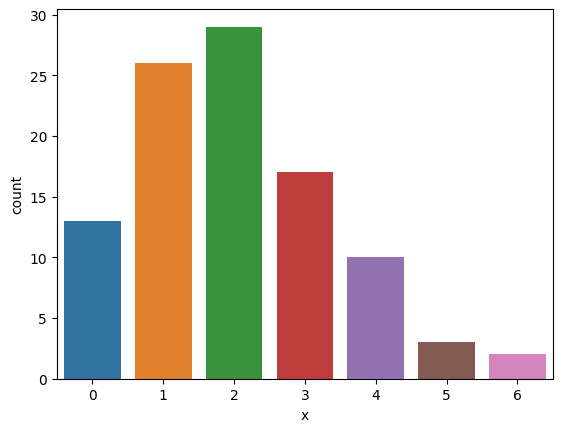

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='x', data=df)
# jupyter以外のツールをつかっている場合はこれを実行すると描画される
# plt.show()

さて、このデータにポアソン分布をあてはめるのが妥当かどうかの確認を進めよう。まずデータの平均値を求める。

In [6]:
df.mean()

x    2.02
dtype: float64

標本の平均値が約2なので、想定するポアソン分布の期待値（パラメータ）も、同じく2.0だと考えてみよう。すると、100日の間に通行人が0人から6人観測される確率を求めることが可能になる。

In [19]:
import numpy as np
times = np.array(range(0,7,1))
from scipy.stats import poisson
x2 = [poisson.pmf(i, 2.0)  for i in times]
X2 = pd.Series(x2)
X2

0    0.135335
1    0.270671
2    0.270671
3    0.180447
4    0.090224
5    0.036089
6    0.012030
dtype: float64

`poisson.pmf(i, 2.0)` が、期待値が2.0のポアソン分布において、0から6の間の整数が出現する確率を求める命令である（前回、第4回講義でも利用した）。この結果を `X2` として保存したので、さきほどのバープロットにかさねてみよう。以下のコードは、2つの図を重ねるためのトリックを使っているが、ここでこのトリック（`twinx()`）を理解する必要はない。とりあえず、データにポアソン分布をあてはめることが適切かどうかをグラフで判断することが、今回の目的である。なお、以下のコードの最後にある `plt.show()` は、Jupyter notebook 以外のツールを使っている場合に必要な命令である。

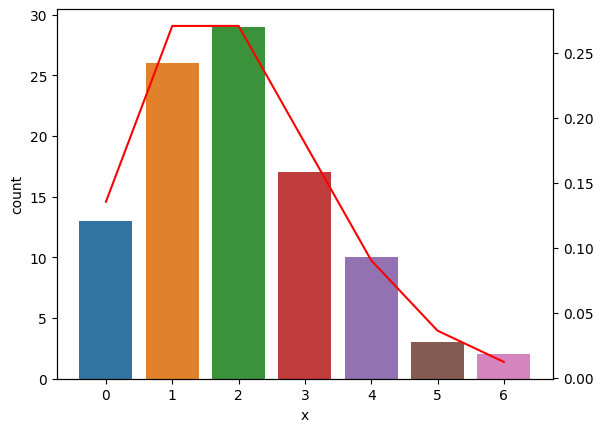

In [21]:
fig, ax1 = plt.subplots()
sns.countplot(x='x', ax=ax1, data=df)
ax2 = ax1.twinx()
ax2.plot(X2,'r-')
# plt.show()

ここで赤い線分が確率である（右側のY軸が確率に対応している）。遊歩道で観察されたのが１人だけという日の確率（右側の縦軸が確率である）が、パラメータ2.0、つまり期待値が2.0のポアソン分布からするとやや小さいようだが、おおむねポアソン分布にしたがっていると判断していいだろう。ただし、グラフの見た目の印象で判断するのでは信用できないというのであれば、来週の講義で説明する**検定**（けんてい：statistical test）という方法を使って、実際の観測値と、その理論値が近いかどうかを判断する方法もある。検定を使えば、グラフの印象ではなく、数値（具体的には確率）を根拠とした判断が可能になる。

### 箱ひげ図

たとえば、ある高校で3年生男子約100名の身長を測ったデータがあるとする。（日本の）3年生男子高校生の身長の平均値は約170センチである。これは文部科学省の「学校保健統計調査（がっこうほけんとうけいちょうさ）」で確認できる。少し脱線（だっせん）するが（as an aside）、こうした政府統計（せいふとうけい）は、e-stat (https://www.e-stat.go.jp/) というポータルで誰でも入手することができる。サイトで「学校保健統計調査」を検索すると、過去のデータのリストが表示される。平成30年度全国版で「年齢別　都市階級別　設置者別　身長・体重の平均値及び標準偏差」を参照されたい。

ここでは、授業用に用意したサンプルデータを読み込もう。

In [10]:
heights = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/public/heights.csv")
heights

x
0   166.8
1   168.7
2   179.0
3   170.4
4   170.7
..    ...
95  108.0
96  107.0
97  109.0
98  106.0
99  107.0

[100 rows x 1 columns]

さて、この高校のデータで平均値を求めたところ、約164センチであった。

In [11]:
heights.mean()

x    164.297
dtype: float64

全国平均値が 170 センチであるから、かなり低いように思える。この高校の男子生徒の間には、なにか健康上の問題があるのだろうか？まずは、データの分布を確認しておこう。この場合、よく使われるグラフに**箱ひげ図**（はこひげず：boxplot）がある。

<Axes: ylabel='x'>

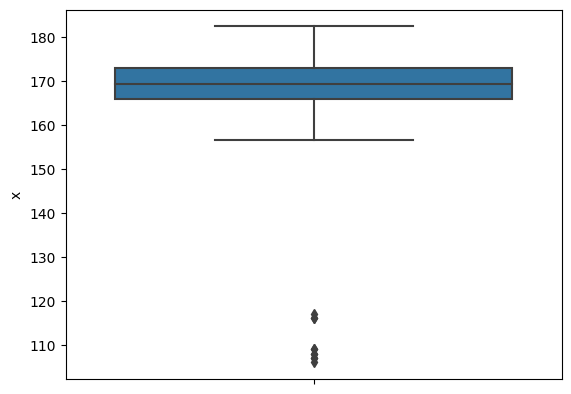

In [12]:
sns.boxplot(y='x', data=heights, orient='v')

すこし分かりにくいグラフかもしれない。まず、Y軸が身長の範囲であるのは問題ないだろう。
上に濃いブルーの箱がある。これが箱ひげ図の箱にあたる。箱の中央にやや太い線が引かれているが、これは中央値である。


In [13]:
heights.median()

x    169.35
dtype: float64

中央値は平均値よりも高く、約169センチである。横軸のメモリと対応しているのを確認しよう。次に、箱の上下（フタと底）は第1四分位数、箱の蓋は第3四分位数に対応する。**第1四分位数**（だいいちしぶんいすう：1st quartile）とは、データを大きさで並べ替えた場合、小さい方から1/4個目(25％)のデータの値に相当する、一方、**第3四分位数**（だいさんしぶんいすう：3rd quartile）は大きさ順で 3/4個目(75％)となる。ちなみに中央値は**第2四分位数**ともいえる。第1四分位数から第3四分位数までの範囲を**四分位範囲**(Interquartile range)ともいう。`quantile()`という関数に、分位数に対応する数値を指定して実行すると、それぞれが求められる。

In [14]:
heights.quantile([0, 0.25, 0.5, 0.75, 1.0])

x
0.00  106.000
0.25  165.975
0.50  169.350
0.75  172.975
1.00  182.500

ただし、四分位数の計算にはいくつか異なる方法が提案されており、ソフトウェアによって出力が微妙に異なる。データサイエンス分野の代表的なツールであるPythonとRでも、出力は少し異なるが、詳細は[外部サイト：ウィキペディア：分位数](https://ja.wikipedia.org/wiki/%E5%88%86%E4%BD%8D%E6%95%B0) などを参照されたい（小テストには出さない）。


つぎに、箱のフタあるいは底からのびている線がヒゲといわれる。
ひげの長さにはいくつかの計算が提案されているのだが、代表的な方法が以下である。

1. ひげの上端は、箱の上辺 + 1.5 * 四分位範囲内の最大値
2. ひげの下端は箱の下端 - 1.5 * IQRの範囲内内の最小値

実際に計算してみよう。

In [15]:
(172.975 + ( 172.975 - 165.975) * 1.5, 165.975 - ( 172.975 - 165.975) * 1.5)

(183.475, 155.475)

そして、この上下にのびたヒゲの外にあるデータは、**外れ値**（はずれち：outlier）とみなされる。この場合、約184センチより高いか、156 センチよりも低い計測値があれば、それは外れ値と判断される。なお、このデータでは最大値が 182.5 なので上側（身長の高い方）に外れ値はない。

箱ひげ図を作成するコードに、すこしオプションを加えて、個別の身長の値を点（ドット）として重ねてみよう。

<Axes: ylabel='x'>

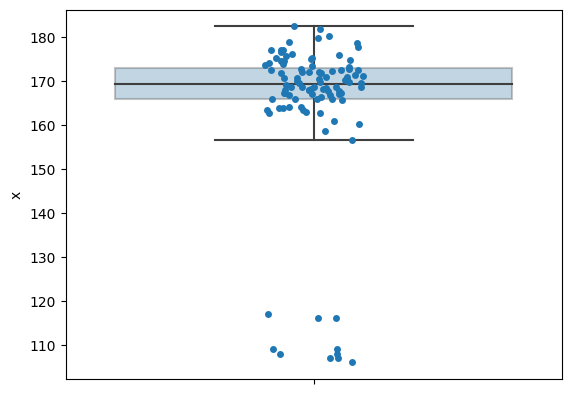

In [16]:
sns.stripplot(y="x", orient='v',  data=heights, jitter=True, edgecolor='gray')
sns.boxplot(y="x", orient='v', data=heights, boxprops=dict(alpha=.3), showfliers=False)

点がX軸の左右に散らばっているのは、ほぼ同じ身長を表す点が重なってしまうのを避けるための工夫である。この箱ひげ図でX軸に意味はない。外れ値が８個ほど確認できるが、いずれも身長が120センチより低い。これらは、記録する際に入力を間違えた可能性が高いだろう。これら8個の外れ値があるため、この高校の男子生徒の平均身長が低く見積もられた可能性がある。この8つの外れ値を除いて、平均値を求めてみよう。


In [17]:
heights[heights.x > 120].mean()

x    170.296667
dtype: float64

外れ値と想定される値を除いて、改めて平均値を求めると、日本の全国平均と同じになった。

### 外れ値と欠損値

データには、外れ値の他、欠損値が含まれていることが多い。**欠損値**（けっそんち：missing values）とは、ある観測対象について、何らかの理由で記録が残されていない状態を指す。データセットでは空白、あるいは NA あるいは99999として記録されていることが多い。

欠損値や外れ値をどのようにあつかうかは難しい問題である。欠損値がある観測対象をデータから削除してしまうのが、もっとも簡単な方法であるが、問題がないわけではない。まず、データ数が少なくなってしまい、分析対象（母集団）を代表しているのか疑わしくなってしまうことがある。さらには、欠損値が系統的（けいとうてきに：systematic）に（偶然ではなく、何らかの理由があって）発生している場合は、誤った分析の結果を出してしまうおそれがある。

たとえば、ある医学検査(medical test)で、被験者（ひけんしゃ：research subjects）それぞれの血圧（けつあつ）を半年にわたって調査していたとする。このようなデータの場合、時間が後になればなるほど欠損値が多くなる。それは、被験者の一部が検査に来なくなるためである。そのような被験者は、まったく健康であるか、逆に出かけられないほど体調が悪化していることが多い。つまり、特定の被験者に集中して欠損値が多くなる。このような場合に欠損値を単純に削除したデータから得られた分析からは、医学的に有益な（ゆうえき、役に立つ）判断はできないだろう。

欠損値を別の値で補う（おぎなう）方法も提案されている。これを補間（ほかん：interpolation）という。補間として平均値を代入することがよく行われるが、統計的には適切な処理とはいえない。欠損値をどのように処理するかは、データサイエンスの分野で研究がすすんでいるが、この講義では省略する。

外れ値についても、もっとも単純な方法は削除してしまうことであるが、これも必ずしも妥当とはいえない。さきほどの高校生の身長データに 107センチという値があれば、それは記録ミスとして削除しても問題ないかも知れない。しかし、偏差値（へんさち、第4回の講義を参照のこと）として75という値（つまり平均値から標準偏差2個半も離れた値）が申告されていた場合、57の間違いなのか、それとも本当に 75 なのか、第三者には判断できないだろう。本書では詳細は省くが、時たま大きな外れ値を出す確率分布にコーシー分布（cauchy distribution）があり、外れ値を含むデータ分析で役に立つ（特にベイズ分析で使われることが多い）。

### 水準間の比較

**水準（レベル）**とはカテゴリ変数の内訳（うちわけ）のことである。「性別」を表すカテゴリ変数では、一般に「女」「男」「どちらでもない」の3つの水準が考えられるだろう。カテゴリ変数では、水準ごとの違いや特徴を確認したい場合がある。たとえば、性別で年収を比較し、女性の年収が不当（ふとう）に低いなどの現状を確認できることがある。ちなみに、カテゴリ変数の水準を分けて考えることを、**層別**（そうべつ：stratified）するという。

実例を検討しよう。餌（えさ）の違いが鶏（にわとり）の成長（体重：weight）に与える効果の違いを考えてみよう。

In [22]:
chickwts = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/public/chickwts.csv")
chickwts

weight       feed
0      179  horsebean
1      160  horsebean
2      136  horsebean
3      227  horsebean
4      217  horsebean
..     ...        ...
66     359     casein
67     216     casein
68     222     casein
69     283     casein
70     332     casein

[71 rows x 2 columns]

ここでは「餌feed」がカテゴリ変数であり、その内訳（「ヒマワリの種」や「そら豆」など6種類）が水準である。


餌の種類（水準）ごとに別々の箱ひげ図を作成してみよう。


<Axes: xlabel='feed', ylabel='weight'>

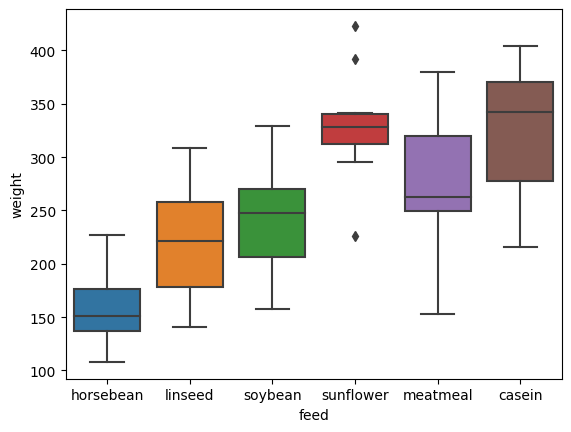

In [23]:
sns.boxplot(x='feed', y='weight', orient='v',data = chickwts)

縦軸は体重であり、それぞれの箱の内部の横線が中央値を表している。乾酪(かんらく：casein)やひまわりの種(sunflower)が与えられた鶏と、そら豆(horse bean)を与えられた鶏では、体重にかなりの違いがあることが分かる。また、ひまわりの種を与えられた鶏の体重には外れ値が多いことが確認できる。いずれにせよ、**餌の種類によって鶏の成長に違いが現れる**ことが、箱ひげ図からも確認できるだろう。


介入（かいにゅう：intervention、この場合は餌の種類を変えること）を行い、その他の条件（鶏舎、けいしゃの広さなどの環境、かんきょう）が同じであるのならば、餌の水準ごとに平均値が違うのは、餌の種類が影響していると考えるのが妥当だろう。

## ヒストグラム

データの分布を確認するグラフとして箱ひげ図を紹介したが、他によく使われるのが**ヒストグラム**である。身長のデータからヒストグラムを作成してみよう。ちなみに、オプションとして`kde=False`を指定しているが、これを外すとどのようなグラフが作成されるか、各自で確認してみよう（小テストに出すという意味ではない）。`kde`とは密度近似関数の描画のオプション、kernel density estimate の略である。

<Axes: ylabel='Count'>

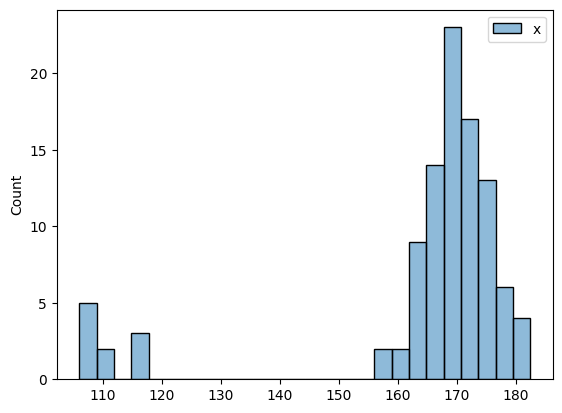

In [24]:
sns.histplot(heights,kde=False)
# plt.show()

表示されている棒（バー）の高さは、ある範囲に含まれるデータ数を表している。たとえば、身長160センチの前後の範囲には2人の生徒がいるのだろう。

一見したところ、いわゆる棒グラフ（バーチャート）のようだが、ヒストグラムではバーの並びに意味がある。この例では、横軸（X軸）の左端は100センチで、右端は190センチとなっている。つまりX軸の値は連続（れんぞく）している。

ヒストグラムとの違いは、バーチャートでは横軸が、例えば「女」と「男」、「その他」、あるいは「賛成」と「反対」などのカテゴリ変数の水準になる。それゆえ、「女」と「男」、「その他」の並びを入れ替えても、データを確認する上で何の不都合（ふつごう）もない。

<Axes: xlabel='Sex', ylabel='Value'>

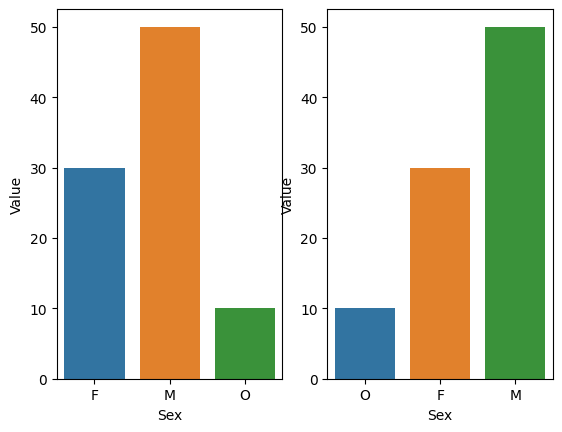

In [25]:
x1 = pd.DataFrame({'Value':[30,50,10], 'Sex':['F','M','O']})
x2 = x1.sort_values(by='Value')
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x='Sex', y='Value', data =x1, ax=ax1)
sns.barplot(x='Sex', y='Value', data =x2, ax=ax2)
# plt.show()

ヒストグラムにおいて、各バーの横幅は、区間、範囲に相当する。このグラフで区間を確認するのは以下のコードを実行すれば良い。

[106.0,
 108.94230769230771,
 111.88461538461539,
 114.8269230769231,
 117.76923076923077,
 120.71153846153848,
 123.65384615384616,
 126.59615384615383,
 129.53846153846155,
 132.48076923076923,
 135.42307692307693,
 138.36538461538458,
 141.30769230769232,
 144.25,
 147.19230769230768,
 150.13461538461536,
 153.0769230769231,
 156.01923076923077,
 158.96153846153845,
 161.90384615384613,
 164.84615384615387,
 167.78846153846155,
 170.73076923076923,
 173.67307692307693,
 176.61538461538458,
 179.55769230769232]

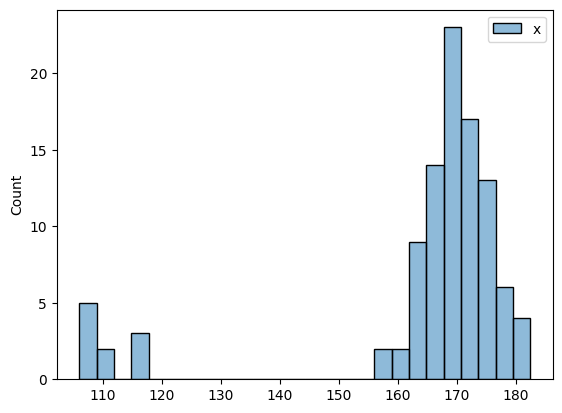

In [26]:
[h.get_x() for h in sns.histplot(heights,kde=False).patches]

左端から、106.0, 108.94, 111.88, という具合に区間が取られていることが分かる。この区間のことを**ビン**(bin)とも表現する。

また、それぞれの区間に何人の生徒がいるかは、以下のように確認できる。

[5,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 9,
 14,
 23,
 17,
 13,
 6,
 4]

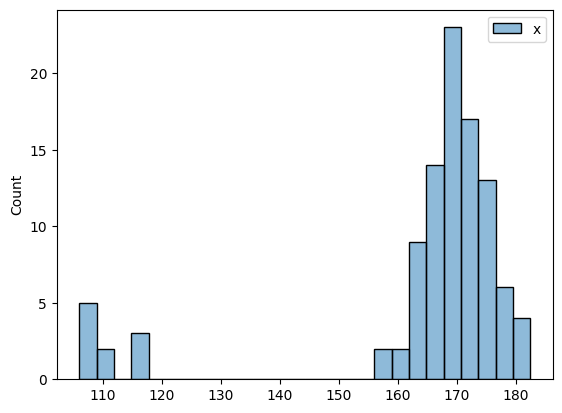

In [27]:
[h.get_height() for h in sns.histplot(heights,kde=False).patches]

左の106.0, 108.94 の区間には5人の生徒が属している。

身長データでは記載ミスに起因すると思われる外れ値が複数あるため、バーは左右に離れて密集している。120センチ以下と記録された生徒が8名いる。


すぐに想像付くであろうが、ヒストグラムはビンの設定によって全く印象の異なるグラフとなる。
ビンをあらく（広く）とって、ヒストグラムを作成してみよう。



<Axes: ylabel='Count'>

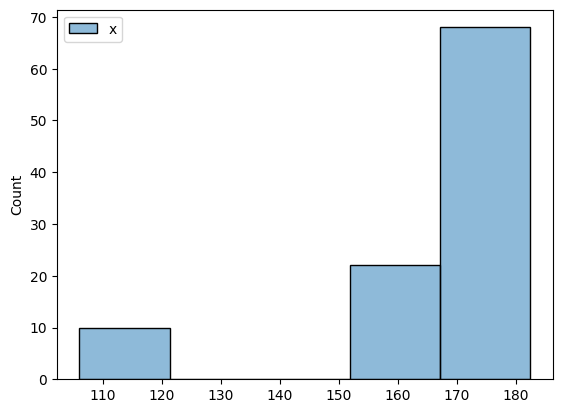

In [28]:
sns.histplot(heights, kde=False, bins=5)

ビンの数を極端に減らした結果、グラフの印象も大きく変わっている。最適なビンを設定する方法が複数提案されているが（Sturgesの方法などだが、**seaborn**ではFreedman-Diaconis の方法が採用されている）、ヒストグラムが恣意的（しいてき：arbitrary）になるのは避けられない。

ヒストグラムを使って、水準間の比較をしてみよう。さきに鶏の体重増加と餌の効果を箱ひげ図で確認した。ここではヒストグラムを使ってみよう。なお、ここでは`map()`という、繰り返し処理をおこなう関数を利用しているが、コードの内容を理解する必要はない（小テストには出さない）

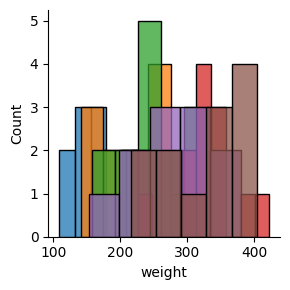

In [29]:
g = sns.FacetGrid(chickwts, hue="feed")
g.map(sns.histplot, 'weight', kde=False)

餌の種類ごとに分布が異なるのは見て取れるだろうが、バーがかさなってしまっているため、餌の効果の違いを確認するのは難しい（むずかしい）だろう。

## 散布図

箱ひげ図、ヒストグラム、バープロットは主に1つの変数を可視化するツールである。データ分析では、二つの変数を同時に描画して、その関係を考察したいことがある。**散布図**（さんぷず：scatter plot）は、二つの変数間の関係を考察するのに多用される可視化ツールである。

ここでは、車のブレーキの性能について調べたデータを例としてとりあげよう。

In [30]:
cars = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/public/cars.csv")
cars

speed  dist
0       4     2
1       4    10
2       7     4
3       7    22
4       8    16
5       9    10
6      10    18
7      10    26
8      10    34
9      11    17
10     11    28
11     12    14
12     12    20
13     12    24
14     12    28
15     13    26
16     13    34
17     13    34
18     13    46
19     14    26
20     14    36
21     14    60
22     14    80
23     15    20
24     15    26
25     15    54
26     16    32
27     16    40
28     17    32
29     17    40
30     17    50
31     18    42
32     18    56
33     18    76
34     18    84
35     19    36
36     19    46
37     19    68
38     20    32
39     20    48
40     20    52
41     20    56
42     20    64
43     22    66
44     23    54
45     24    70
46     24    92
47     24    93
48     24   120
49     25    85

車の速度と、停止距離の関係を散布図で表してみよう。なお、以下のコードの最後にある `plt.show()` は、Jupyter notebookを使っている場合は不要であるので、削除するように。

<Axes: xlabel='speed', ylabel='dist'>

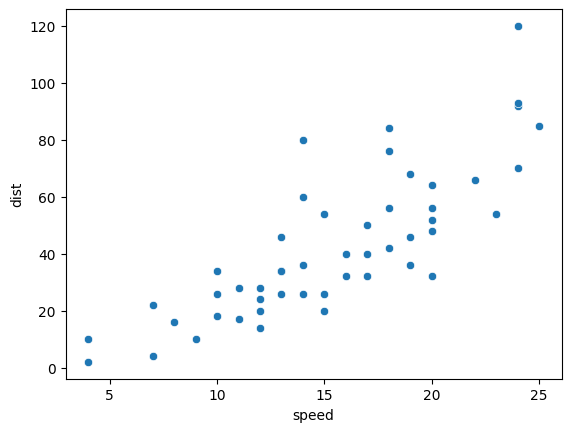

In [31]:
sns.scatterplot(data=cars,x='speed',y='dist')
# plt.show()

グラフの各点は、ある乗用車のデータで、X軸にブレーキを思い切り踏む直前の速度（マイル）、Y軸に停止までに要した距離（フィート）が対応している。車を表す各点が、おおむね左下から右上に並んでいるのが見と取れる。つまり、速度が大きいほど、完全に停止するまでに必要な距離が大きくなるのが分かるだろう。2つのデータ間の関係をデータサイエンスでは相関と呼ぶ。

### 相関

散布図で車の速度と停止距離の間には何らかの関係性が確認できた。これを**相関**（そうかん：correlation）があると表現する。相関は、一般的には以下の式で表現される。


$$
r_{xy} = \frac{\displaystyle \frac{1}{n}\sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \frac{1}{n}\sum_{i = 1}^n 
(x_i - \overline{x})^2}\sqrt{\displaystyle \frac{1}{n}\sum_{i = 1}^n 
(y_i - \overline{y})^2}}
$$

変数 $x$ の $i$ 番目の要素 $x_i$ から、$x$ の平均値 ($\overline{x}$) を引いた値は、$x$ の**偏差**（へんさ：deviation）である。分子は、$x$ と $y$ それぞれ $i$ 番目の要素の偏差を求めて乗じ、その合計になっている。これを**共分散**（きょうぶんさん：	covariance）という。$x$ と $y$ それぞれの偏差の符号（ふごう、プラスマイナス）が一致する場合、共分散は正の値になる。逆に、それぞれの偏差の符号が異なる場合、共分散は負の値になる。符号が一致しない場合というのは、たとえば、気温が高くなると、熱い食べ物（なべ料理）の消費量（しょうひりょう）が減るなどの関係である。

共分散の大きさは、データの大きさに依存（いぞん）するため、二つの変数それぞれの標準偏差の積で割った値が相関係数である。相関係数は、元データの単位に関わらず、-1から1の間の数値になる。絶対値（ぜったいち）が1に近いほど、二つの変数間には強い相関が認められる。

二つの変数の間に相関がある場合、一方を利用することで他方を予測（よそく：predict）することが可能になる。気温が高いのであれば、なべ料理の売上は低くなると予測できるだろう。これを発展させた手法が**回帰分析**（かいきぶんせき：regeression）であり、研究だけでなくさまざまなビジネスで利用されている。回帰分析については、次回の講義で説明する。

### 相関と因果

ちなみに、二つの変数間に相関が認められたとしても、それが因果であるとは限らない。**因果**（いんが：cause）とは、一方が他方の原因（げんいん）になっている状態のことである。

たとえば、会社で社員の血圧（けつあつ）を調べると、その年収（ねんしゅう）と相関があるだろう。これは、年齢（ねんれい）という第三の変数を考えると説明がつく。年齢が高くなると一般に血圧は上がるが、一方で、年功序列社会（ねんこうじょれつしゃかい：seniority rule）では年齢が高くなると、年収も増えているのである。つまり、血圧と年収は相関しているが、それは因果ではない。こうした相関を**疑似相関**（ぎじそうかん：pseudo correlation）という。

因果関係を立証（りっしょう、証明）するには、ランダム化実験 (randomization experiment)などの計画的（けいかくてきな）な調査と分析方法が必要となる（第１回目の講義で、2018年のノーベル経済学賞が、ランダム化実験にもとづく成果に贈られたことを紹介した）。

### Anscombe's quartet

データの可視化が重要な事例として、アンスコムのデータを紹介しよう。これは、統計学者のフランク・アンスコムが人工的に作成したデータで、基本統計量が同じあるにも関わらず、実際の分布がまったく異なっている事例としてよく知られている。

Anscombeのデータも **seaborn** ライブラリに入っているので、まずデータを読み込もう。

In [32]:
anscombe = sns.load_dataset('anscombe')
anscombe

dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89

`dataset` 列には I,II,III,IVの水準がある。つまり ４ 種類のデータセットがある。それぞれのデータセットには `x` と `y` の二つの変数がある。まず、データセットごとに `x`および`y`それぞれの平均値と分散を確認してみよう。

In [33]:
anscombe.groupby('dataset').agg(['mean','var'])

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

このコードは **pandas** ライブラリのやや高度な機能を利用している。言葉で説明すると、データをまず `groupby()` で 列の水準で分割する。このデータではI,II,III,IVの４つの水準があるので、`anscombe` が４つのグループに分けられる。それぞれのグループの変数 `x` と`y` それぞれの平均値と分散を求めるが、`agg()` という関数を使うと、４つのグループそれぞれにある二つの変数に対して平均値と分散を求める処理が一気に行えるのである。

[外部サイト：Qiita：Pandas の groupby の使い方](https://qiita.com/propella/items/a9a32b878c77222630ae)

出力から、データセットの平均値と分散は、ほぼ一致していることが確認できる。ところが、それぞれのデータセットを散布図で描いてみると、分布がまったく異なっていることに気がつくだろう。

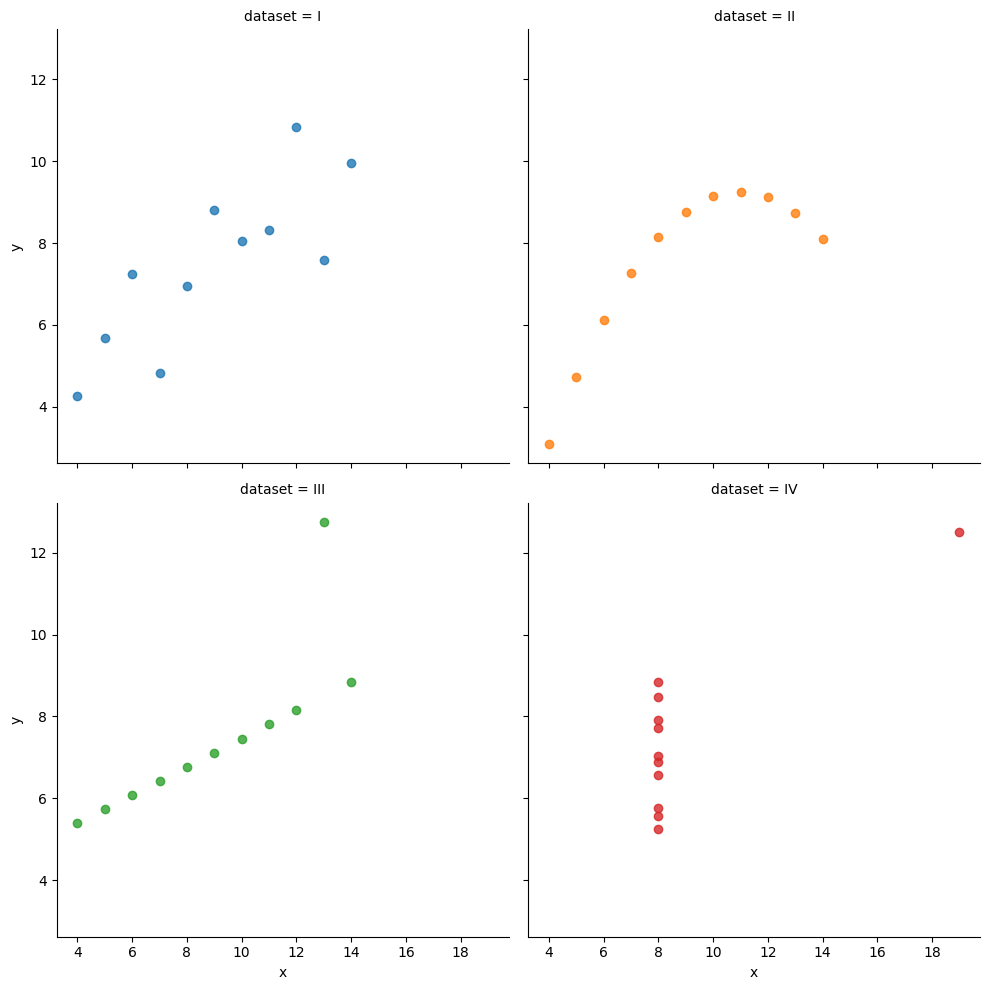

In [34]:
sns.lmplot(x="x", y="y", data=anscombe, fit_reg=False, hue="dataset", col="dataset", col_wrap=2)

`lmplot()`は、散布図に、回帰直線（かいきちょくせん：regression line）も加えている。回帰直線については、第７回の講義で取り上げる予定である。

## Pythonとグラフ

[Intro to pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)

[An introduction to seaborn](https://seaborn.pydata.org/introduction.html)

<iframe width="560" height="315" src="https://www.youtube.com/embed/4Rz8cpEw66E" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>



## 小テストについて
このコンテンツを読んだあと、**「第5週小テスト（全員かならず回答すること）」** を忘れずに受験すること。受験したことで、第5週の講義に出席したものとする。